In [1]:
from tslearn.datasets import UCR_UEA_datasets
import numpy as np 
import torch 
import seaborn as sns
import sklearn
from ClassificationModels.LSTM_T import LSTM
from ClassificationModels.CNN_T import ResNetBaseline, get_all_preds, fit, UCRDataset


In [2]:
#Load Data 
dataset='GunPoint'
X_train,y_train, X_test, y_test=UCR_UEA_datasets().load_dataset(dataset)
train_x=X_train.reshape(-1,X_train.shape[-2],X_train.shape[-1])
test_x=X_test.reshape(-1,X_train.shape[-2],X_train.shape[-1])
train_y = y_train
test_y=y_test
enc1=sklearn.preprocessing.OneHotEncoder(sparse=False).fit(np.vstack((train_y.reshape(-1,1),test_y.reshape(-1,1))))
#pickle.dump(enc1,open(f'../../ClassificationModels/models/{dataset}/OneHotEncoder.pkl','wb'))

train_y=enc1.transform(train_y.reshape(-1,1))
test_y=enc1.transform(test_y.reshape(-1,1)) 

print(train_y)
#Load Model 
n_pred_classes =len(np.unique(train_y))
train_dataset = UCRDataset(train_x.astype(np.float64),train_y.astype(np.int64))
test_dataset = UCRDataset(test_x.astype(np.float64),test_y.astype(np.int64))
train_loader = torch.utils.data.DataLoader(train_dataset,batch_size=16,shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset,batch_size=1,shuffle=False)

[[0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [3]:
model = LSTM(1, 10 ,2 ,0.1)#ResNetBaseline(in_channels=1, num_pred_classes=n_pred_classes)
#fit(model,train_loader,test_loader)
model.load_state_dict(torch.load(f'../../ClassificationModels/models/{dataset}/LSTM'))

#model.eval()

<All keys matched successfully>

In [4]:
item = np.array([test_x[0,:,:]],dtype=np.float64)
label =0

In [7]:
#TODO SLIDING WINDOW
from TSInterpret.InterpretabilityModels.Saliency.TSR import TSR
int_mod=TSR(model, train_x.shape[-2],train_x.shape[-1], method='FO', mode='time')
print(item.shape)
exp= int_mod.explain(item,labels=label,TSR =False)

(1, 150, 1)


(150, 1)
(1, 150, 1)
time mode


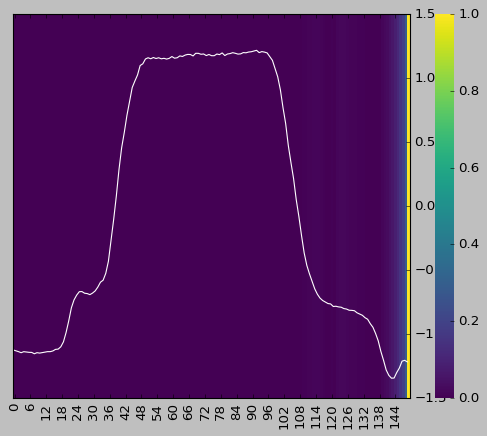

In [8]:
print(exp.shape)
print(np.array([test_x[0,:,:]]).shape)
int_mod.plot(np.array([test_x[0,:,:]]),exp, figsize=(30,30))